<a href="https://colab.research.google.com/github/Gurjot-Singh-2002/UML501-PROJECT/blob/main/UML501_Project_Stock_Price_Predictor_(By_Gurjot%2C_Anil).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Price Predictor using LSTM
Prepared by-
Gurjot Singh (102203582)
Anil Kumar (102383026)

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Importing Data

In [ ]:
# Load the Training Dataset
df_train = pd.read_csv("/content/Google_Stock_Price_Train.csv")
df_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
# Handling missing values
df_train['Open'] = df_train['Open'].interpolate(method='linear')

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


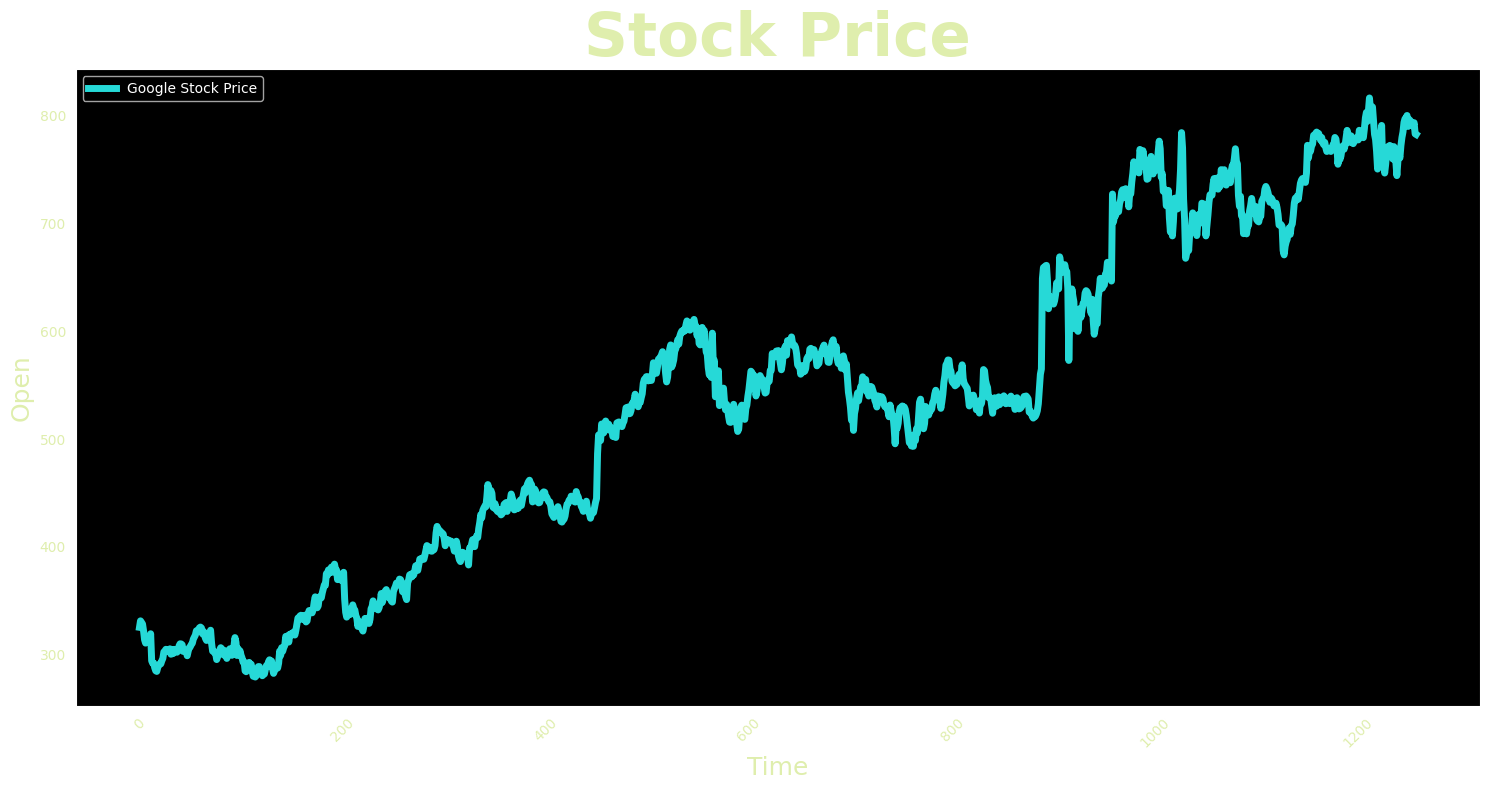

In [ ]:
data = df_train.loc[:,["Open"]].values
print(data)

plt.figure(figsize=(15, 8))
plt.style.use("dark_background")

plt.plot(data, linewidth=5, color='#26D9D7', label='Google Stock Price')
plt.title("Stock Price", weight="bold", size=44, color='#dfeead')
plt.xlabel("Time", size=18, color='#dfeead')
plt.ylabel("Open", size=18, color='#dfeead')

plt.xticks(rotation=45, color='#dfeead')
plt.yticks(color='#dfeead')
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
# Using open stock values
train_set = df_train[['Open']].values

print(train_set)
print(train_set.shape)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]
(1258, 1)


# Preprocessing Data

In [ ]:
# Normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaled_train_set = scaler.fit_transform(train_set)

scaled_train_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

# Creating X_train and y_train Data Structures.

In [ ]:
X_train = []
y_train = []

for i in range (60, len(scaled_train_set)):
    X_train.append(scaled_train_set[i-60:i, 0])
    y_train.append(scaled_train_set[i, 0])

X_train = np.array(X_train)
y_train = np.array(y_train)

In [ ]:
print(X_train.shape, y_train.shape)

(1198, 60) (1198,)



# Reshaping the Data

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)

(1198, 60, 1)


# Building the model by adding the layers to LSTM

In [ ]:
regressor = Sequential()

# First LSTM layer
regressor.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

# Second LSTM layer
regressor.add(LSTM(units=100, return_sequences=False))
regressor.add(Dropout(0.2))

# Dense layers
regressor.add(Dense(units=50, activation='relu'))
regressor.add(Dense(units=1))  # Final output layer

# Compile the model
regressor.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Fitting the Model

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 124ms/step - loss: 0.0751
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0034
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 0.0026
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 0.0023
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0025
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.0022
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - loss: 0.0025
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - loss: 0.0021
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - loss: 0.0022
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - loss: 0.0022
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - loss: 0.0017
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - loss: 0.0020
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - loss: 0.0018
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0016
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/ste

# Extracting the Actual Values

In [ ]:
# Load test data
df_test = pd.read_csv("/content/Google_Stock_Price_Test.csv")
actual_stock_price = df_test[['Open']].values

In [ ]:
# Handle missing values
df_test['Open'] = df_test['Open'].interpolate(method='linear')

# Preparing the Input for the Model

In [ ]:
dataset_total = pd.concat((df_train['Open'], df_test['Open']), axis = 0)
inputs = dataset_total [len (dataset_total)- len(df_test)-60:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []

for i in range (60,len(inputs)):
       X_test.append(inputs [i-60:i, 0])

X_test = np.array(X_test)
X_test= np.reshape (X_test, (X_test.shape [0], X_test.shape [1], 1))

# Predict the Stock Price

In [ ]:
predict_stock_price = regressor.predict(X_test)
predict_stock_price = scaler.inverse_transform(predict_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


# Evaluate the model

In [ ]:
# Calculate metrics
mae = mean_absolute_error(actual_stock_price, predict_stock_price)
rmse = np.sqrt(mean_squared_error(actual_stock_price, predict_stock_price))
mape = np.mean(np.abs((actual_stock_price - predict_stock_price) / actual_stock_price)) * 100

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Accuracy (Percentage of closeness to actual prices)
accuracy = 100 - mape
print(f"Model Accuracy: {accuracy:.2f}%")

Mean Absolute Error (MAE): 6.725872192382809
Root Mean Squared Error (RMSE): 9.019740873245697
Mean Absolute Percentage Error (MAPE): 0.83%
Model Accuracy: 99.17%


In [ ]:
# Print example actual and predicted stock prices
for i in range(10):
    print(f"Day {i+1}: Actual Price = {actual_stock_price[i][0]:.2f}, Predicted Price = {predict_stock_price[i][0]:.2f}")

Day 1: Actual Price = 778.81, Predicted Price = 784.89
Day 2: Actual Price = 788.36, Predicted Price = 782.03
Day 3: Actual Price = 786.08, Predicted Price = 787.38
Day 4: Actual Price = 795.26, Predicted Price = 788.46
Day 5: Actual Price = 806.40, Predicted Price = 793.83
Day 6: Actual Price = 807.86, Predicted Price = 802.70
Day 7: Actual Price = 805.00, Predicted Price = 806.14
Day 8: Actual Price = 807.14, Predicted Price = 804.24
Day 9: Actual Price = 807.48, Predicted Price = 804.34
Day 10: Actual Price = 807.08, Predicted Price = 805.02


# Plotting the Actual and Predicted Prices for Google Stocks.

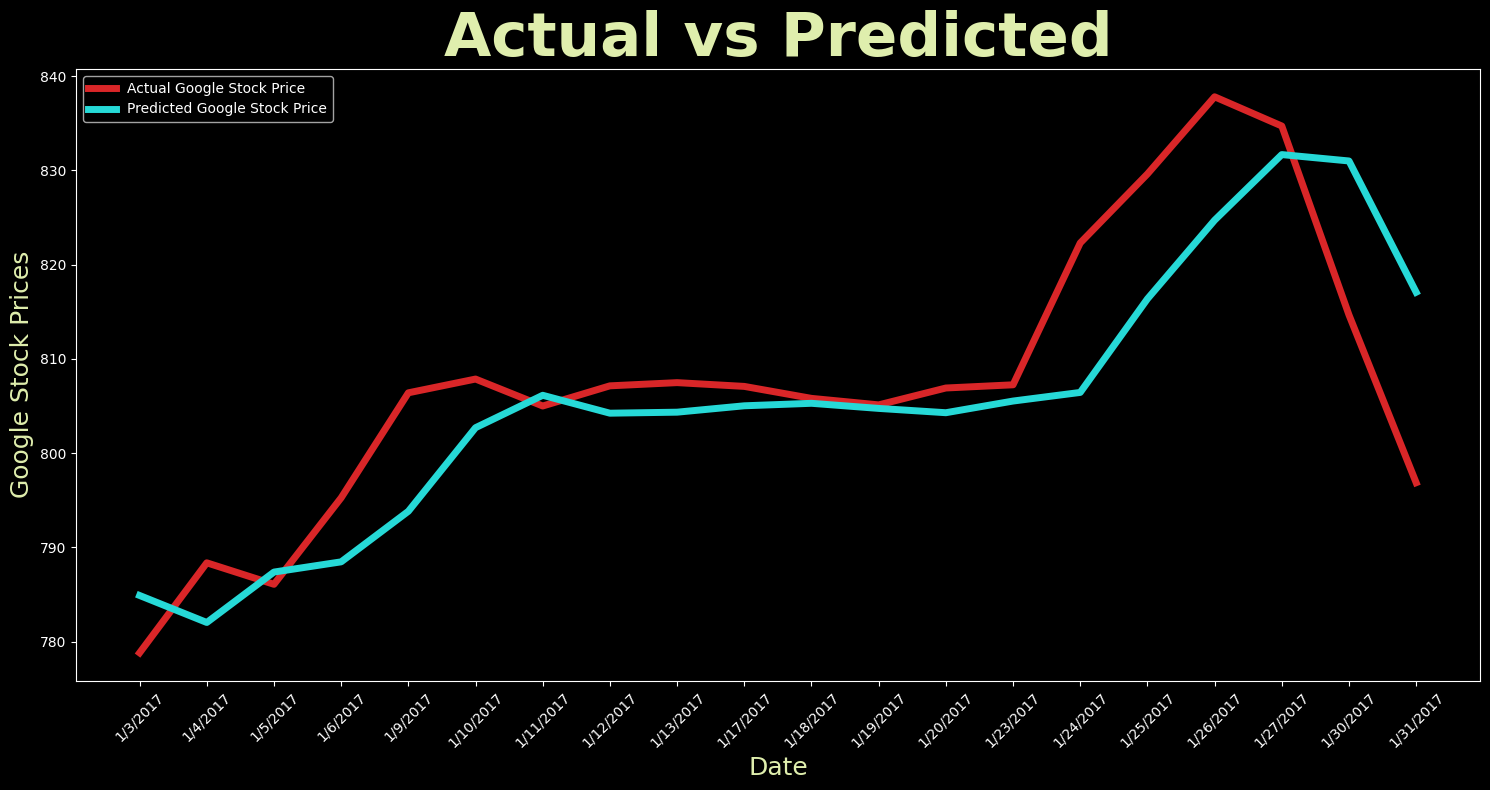

In [ ]:
plt.figure(figsize=(15, 8))
plt.style.use("dark_background")

plt.plot(df_test["Date"], actual_stock_price, linewidth=5, color='#d92628', label='Actual Google Stock Price')
plt.plot(df_test["Date"], predict_stock_price, linewidth=5, color='#26D9D7', label='Predicted Google Stock Price')

plt.title("Actual vs Predicted", weight="bold", size="44", color='#dfeead')
plt.xlabel("Date", size="18", color='#dfeead')
plt.ylabel("Google Stock Prices", size="18", color='#dfeead')

plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()